<a href="https://colab.research.google.com/github/chakshu-dhannawat/Toxic-Comment-Classification/blob/main/Toxic_Comment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy import linalg
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer
import math
from collections import Counter
from sklearn.model_selection import train_test_split,cross_val_score
import string
import os
import pickle
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import scipy
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##Loading Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PRML_CourseProject_ToxicComment/all_data.csv")

In [ ]:
df.isna().sum()

id                                           0
comment_text                                 1
split                                        0
created_date                                 0
publication_id                               0
parent_id                               864807
article_id                                   0
rating                                       0
funny                                        0
wow                                          0
sad                                          0
likes                                        0
disagree                                     0
toxicity                                     0
severe_toxicity                              0
obscene                                      0
sexual_explicit                              0
identity_attack                              0
insult                                       0
threat                                       0
male                                   1551516
female       

In [ ]:
df_new = df[['comment_text','severe_toxicity', 'obscene', 'threat', 'identity_attack', 'insult','sexual_explicit', 'funny', 'toxicity']]

In [ ]:
df_new.dropna(axis=0, inplace=True)

In [ ]:
df_new.isna().sum()

comment_text       0
severe_toxicity    0
obscene            0
threat             0
identity_attack    0
insult             0
sexual_explicit    0
funny              0
toxicity           0
dtype: int64

##Visualization of data

In [ ]:
df_new.head()

,comment_text,severe_toxicity,obscene,threat,identity_attack,insult,sexual_explicit,funny,toxicity
0,He got his money... now he lies in wait till a...,0.044776,0.089552,0.014925,0.000000,0.343284,0.014925,0,0.373134
1,Mad dog will surely put the liberals in mental...,0.013158,0.065789,0.065789,0.092105,0.565789,0.013158,0,0.605263
2,And Trump continues his lifelong cowardice by ...,0.015873,0.031746,0.000000,0.047619,0.666667,0.000000,1,0.666667
3,"""while arresting a man for resisting arrest"".\...",0.065789,0.552632,0.105263,0.000000,0.684211,0.592105,0,0.815789
4,Tucker and Paul are both total bad ass mofo's.,0.037500,0.337500,0.000000,0.037500,0.487500,0.275000,0,0.550000


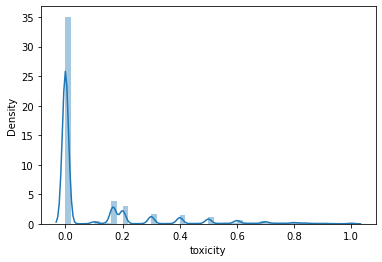

In [ ]:
sns.distplot(df_new['toxicity'])

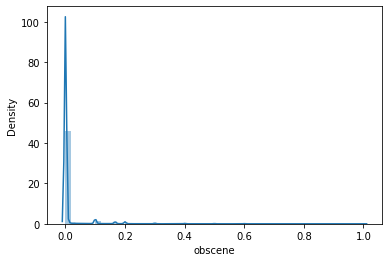

In [ ]:
sns.distplot(df_new['obscene'])

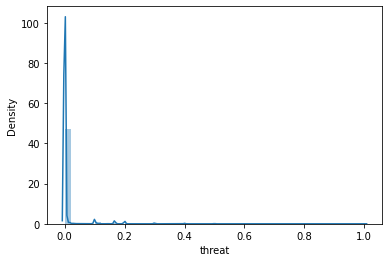

In [ ]:
sns.distplot(df_new['threat'])

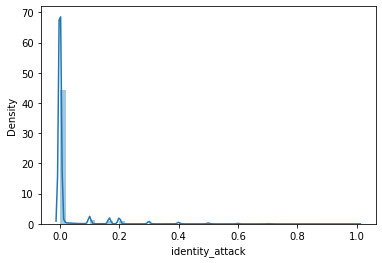

In [ ]:
sns.distplot(df_new['identity_attack'])

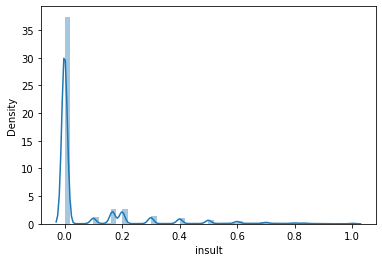

In [ ]:
sns.distplot(df_new['insult'])

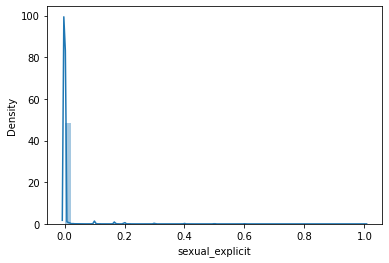

In [ ]:
sns.distplot(df_new['sexual_explicit'])

In [ ]:
df_new['funny'].unique()

array([  0,   1,   2,   3,   4,   5,   7,   8,   6,  12,  11,  20,  10,
        23,  13,   9,  16,  17,  15,  18,  21,  36,  14,  24,  19,  22,
        28,  33,  34,  30,  25,  32,  46,  26,  48,  37,  44,  31,  41,
        38,  27,  40,  54,  58,  35,  29,  47,  51,  45,  39,  43, 102,
        93,  50,  42,  49,  73,  94,  95,  52,  61,  56])

In [ ]:
df_new['target_sexual_explicit'] = df_new['sexual_explicit'].apply(lambda x: 0 if x < 0.05 else 1)
df_new['target_funny'] = df_new['funny'].apply(lambda x: 1 if x>0 else 0)
df_new['target_obscene'] = df_new['obscene'].apply(lambda x: 0 if x < 0.05 else 1)
df_new['target_threat'] = df_new['threat'].apply(lambda x: 0 if x < 0.05 else 1)
df_new['target_identity_attack'] = df_new['identity_attack'].apply(lambda x: 0 if x < 0.05 else 1)
df_new['target_insult'] = df_new['insult'].apply(lambda x: 0 if x < 0.05 else 1)
df_new['target_toxicity'] = df_new['toxicity'].apply(lambda x: 0 if x < 0.2 else 1)

In [ ]:
df_new.head()

,comment_text,severe_toxicity,obscene,threat,identity_attack,insult,sexual_explicit,funny,toxicity,target_sexual_explicit,target_funny,target_obscene,target_threat,target_identity_attack,target_insult,target_toxicity
0,He got his money... now he lies in wait till a...,0.044776,0.089552,0.014925,0.000000,0.343284,0.014925,0,0.373134,0,0,1,0,0,1,1
1,Mad dog will surely put the liberals in mental...,0.013158,0.065789,0.065789,0.092105,0.565789,0.013158,0,0.605263,0,0,1,1,1,1,1
2,And Trump continues his lifelong cowardice by ...,0.015873,0.031746,0.000000,0.047619,0.666667,0.000000,1,0.666667,0,1,0,0,0,1,1
3,"""while arresting a man for resisting arrest"".\...",0.065789,0.552632,0.105263,0.000000,0.684211,0.592105,0,0.815789,1,0,1,1,0,1,1
4,Tucker and Paul are both total bad ass mofo's.,0.037500,0.337500,0.000000,0.037500,0.487500,0.275000,0,0.550000,1,0,1,0,0,1,1


In [ ]:
def get_comment_nature(row):
    row = [row['severe_toxicity'], row['obscene'], row['identity_attack'], row['insult'], row['threat'],row['sexual_explicit'],row['funny']]
    
    maxarg = np.argmax(np.array(row))
    
    if maxarg == 0: return 'severe_toxicity'
    elif maxarg == 1: return 'obscene'
    elif maxarg == 2: return 'identity_attack'
    elif maxarg == 3: return 'insult'
    elif maxarg == 5: return 'sexual_explicit'
    elif maxarg == 6: return 'funny'
    else: return 'threat'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


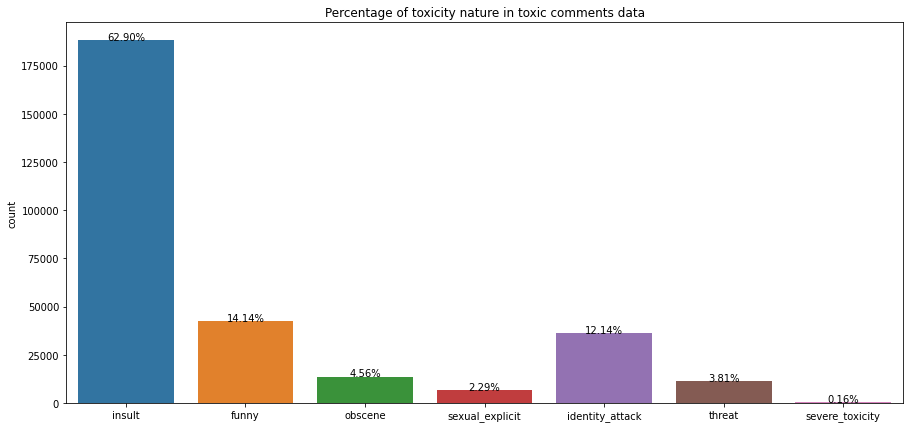

In [ ]:
temp = df[df['toxicity'] > 0.2]
x = temp.apply(get_comment_nature, axis=1) 
fig, ax = plt.subplots(1,1,figsize=(15,7))
total = float(len(x))

cntplot = sns.countplot(x)
cntplot.set_title('Percentage of toxicity nature in toxic comments data')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')
    
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


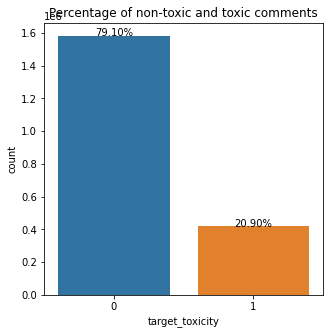

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
total = float(len(df_new['target_toxicity']))

cntplot = sns.countplot(df_new['target_toxicity'])
cntplot.set_title('Percentage of non-toxic and toxic comments')

for p in ax.patches:
    # Get height.
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')
    
plt.show()

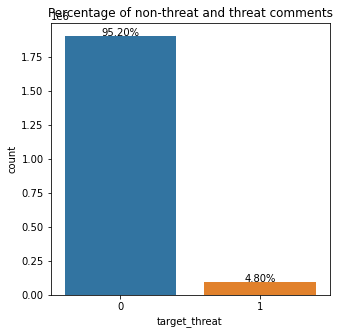

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
total = float(len(df_new['target_threat']))

cntplot = sns.countplot(df_new['target_threat'])
cntplot.set_title('Percentage of non-threat and threat comments')

for p in ax.patches:
    # Get height.
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')
    
plt.show()

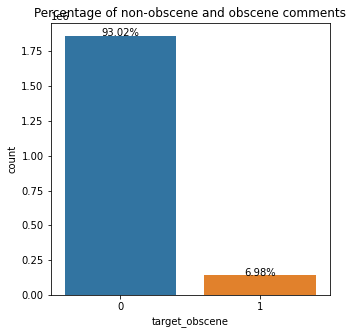

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
total = float(len(df_new['target_obscene']))

cntplot = sns.countplot(df_new['target_obscene'])
cntplot.set_title('Percentage of non-obscene and obscene comments')

for p in ax.patches:
    # Get height.
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')
    
plt.show()

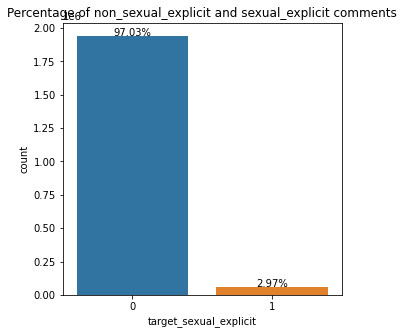

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
total = float(len(df_new['target_sexual_explicit']))

cntplot = sns.countplot(df_new['target_sexual_explicit'])
cntplot.set_title('Percentage of non_sexual_explicit and sexual_explicit comments')

for p in ax.patches:
    # Get height.
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')
    
plt.show()

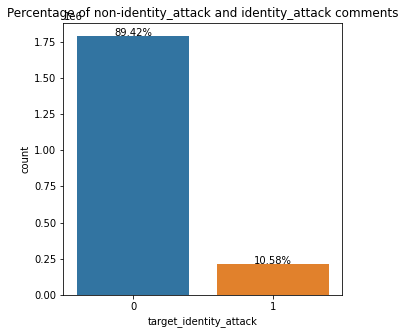

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
total = float(len(df_new['target_identity_attack']))

cntplot = sns.countplot(df_new['target_identity_attack'])
cntplot.set_title('Percentage of non-identity_attack and identity_attack comments')

for p in ax.patches:
    # Get height.
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')
    
plt.show()

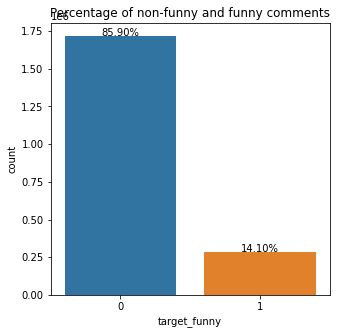

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
total = float(len(df_new['target_funny']))

cntplot = sns.countplot(df_new['target_funny'])
cntplot.set_title('Percentage of non-funny and funny comments')

for p in ax.patches:
    # Get height.
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.0, height + 3, '{:1.2f}%'.format(100*height/total), ha='center')
    
plt.show()

In [ ]:
cols_target = ['target_toxicity','target_funny','target_obscene','target_sexual_explicit','target_threat','target_insult', 'target_identity_attack']

In [ ]:
data = df_new[cols_target]

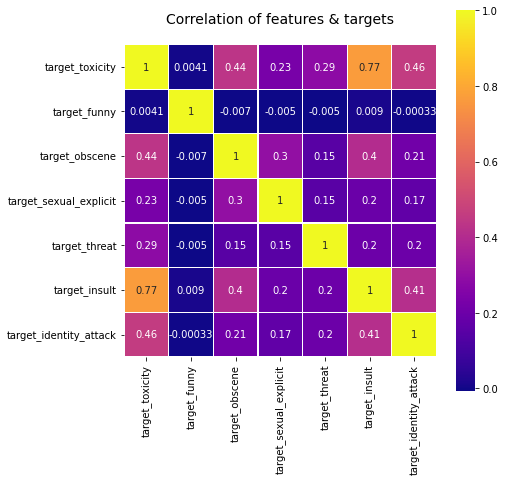

In [ ]:
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

We can see that there is high correlation between toxicity, insult and identity_attack.

using Porter Stemmer for removing unwanted suffixes, and improve information retreival of our model.

In [ ]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
def preprocess(text_string):
    text_string = "".join([c for c in text_string if c not in string.punctuation])
    text_string = text_string.lower() # Convert everything to lower case.
    text_string = re.sub('[^A-Za-z0-9]+', ' ', text_string) # Remove special characters and punctuations
    
    x = text_string.split()
    new_text = []
    
    for word in x:
        if word not in stop_words:
            new_text.append(stemmer.stem(word))
            
    text_string = ' '.join(new_text)
    return text_string

In [ ]:
df_new['preprocessed_text'] = df_new['comment_text'].apply(preprocess)

In [ ]:
df_new.head()

,comment_text,severe_toxicity,obscene,threat,identity_attack,insult,sexual_explicit,funny,toxicity,target_sexual_explicit,target_funny,target_obscene,target_threat,target_identity_attack,target_insult,target_toxicity,preprocessed_text
0,He got his money... now he lies in wait till a...,0.044776,0.089552,0.014925,0.000000,0.343284,0.014925,0,0.373134,0,0,1,0,0,1,1,got money lie wait till elect 2 yr dirti polit...
1,Mad dog will surely put the liberals in mental...,0.013158,0.065789,0.065789,0.092105,0.565789,0.013158,0,0.605263,0,0,1,1,1,1,1,mad dog sure put liber mental hospit boorah
2,And Trump continues his lifelong cowardice by ...,0.015873,0.031746,0.000000,0.047619,0.666667,0.000000,1,0.666667,0,1,0,0,0,1,1,trump continu lifelong cowardic make announc a...
3,"""while arresting a man for resisting arrest"".\...",0.065789,0.552632,0.105263,0.000000,0.684211,0.592105,0,0.815789,1,0,1,1,0,1,1,arrest man resist arrest copsuck cant see prob...
4,Tucker and Paul are both total bad ass mofo's.,0.037500,0.337500,0.000000,0.037500,0.487500,0.275000,0,0.550000,1,0,1,0,0,1,1,tucker paul total bad ass mofo


In [ ]:
vectorizer = TfidfVectorizer(analyzer = 'word',stop_words='english', max_features=10000)

In [ ]:
X = df_new['preprocessed_text'].copy(deep=True)

In [ ]:
##Vectorizing text and saving the models

In [ ]:
X_final = vectorizer.fit_transform(df_new['preprocessed_text'])

In [ ]:
scipy.sparse.save_npz('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/X_vectorized_new.npz', X_final)
#X_final.tofile('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/X_vectorized.csv', sep = ',')

# Code to load it
# sparse_matrix = scipy.sparse.load_npz('/tmp/sparse_matrix.npz')

In [ ]:
df_new.to_csv('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/df_target_variables_new.csv')

In [ ]:
pickle.dump(vectorizer.vocabulary_,open("/content/drive/MyDrive/PRML_CourseProject_ToxicComment/feature_new.pkl","wb"))

# Code to load it
# transformer = TfidfTransformer()
# loaded_vec = CountVectorizer(decode_error="replace",vocabulary=pickle.load(open("feature.pkl", "rb")))
# tfidf = transformer.fit_transform(loaded_vec.fit_transform(np.array(["aaa ccc eee"])))

##Loading Data

In [ ]:
X_final = scipy.sparse.load_npz('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/X_vectorized.npz')

In [ ]:
df_new = pd.read_csv('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/df_target_variables.csv')

In [ ]:
df_new.head()

,Unnamed: 0,comment_text,severe_toxicity,obscene,threat,identity_attack,insult,sexual_explicit,funny,toxicity,target_sexual_explicit,target_funny,target_obscene,target_threat,target_identity_attack,target_insult,target_toxicity,preprocessed_text
0,0,He got his money... now he lies in wait till a...,0.044776,0.089552,0.014925,0.000000,0.343284,0.014925,0,0.373134,0,0,1,0,0,1,1,got money lie wait till elect 2 yrs dirti poli...
1,1,Mad dog will surely put the liberals in mental...,0.013158,0.065789,0.065789,0.092105,0.565789,0.013158,0,0.605263,0,0,1,1,1,1,1,mad dog sure put liber mental hospit boorah
2,2,And Trump continues his lifelong cowardice by ...,0.015873,0.031746,0.000000,0.047619,0.666667,0.000000,1,0.666667,0,1,0,0,0,1,1,trump continu lifelong cowardic make announc a...
3,3,"""while arresting a man for resisting arrest"".\...",0.065789,0.552632,0.105263,0.000000,0.684211,0.592105,0,0.815789,1,0,1,1,0,1,1,arrest man resist arrest cop sucker see proble...
4,4,Tucker and Paul are both total bad ass mofo's.,0.037500,0.337500,0.000000,0.037500,0.487500,0.275000,0,0.550000,1,0,1,0,0,1,1,tucker paul total bad ass mofo


In [ ]:
cols_target = ['target_toxicity','target_funny','target_obscene','target_sexual_explicit','target_threat','target_insult', 'target_identity_attack']

##Looking at some comments from each class

Toxic comments

In [ ]:
rslt_df = df_new[df_new['target_toxicity'] == 1].copy()
print('\nResult dataframe :\n', rslt_df['comment_text'])


Result dataframe :
 0          He got his money... now he lies in wait till a...
1          Mad dog will surely put the liberals in mental...
2          And Trump continues his lifelong cowardice by ...
3          "while arresting a man for resisting arrest".\...
4             Tucker and Paul are both total bad ass mofo's.
                                 ...                        
1999510    Another man shamming article. If white men did...
1999511    "no matter what is put in front of you regardi...
1999512    The Democrat party aided and abetted by it's M...
1999513    I just don't find her a very good representati...
1999514    You know the Trump fanatics are trolling the G...
Name: comment_text, Length: 417905, dtype: object


In [ ]:
print(rslt_df['comment_text'].iloc[0])

He got his money... now he lies in wait till after the election in 2 yrs.... dirty politicians need to be afraid of Tar and feathers again... but they aren't and so the people get screwed.


Funny Comments

In [ ]:
rslt_df = df_new[df_new['target_funny'] == 1].copy()
print('\nResult dataframe :\n', rslt_df['comment_text'])


Result dataframe :
 2          And Trump continues his lifelong cowardice by ...
9          Only a fool would believe that the MSM is not ...
10         NO !  There are no alternative facts. Go check...
12         Wow, some mental gymnastics there Mr Gupta Tro...
30         Stupid is what stupid thinks (and says).\n\nCh...
                                 ...                        
1999454    In a speech about this attack, Theresa May add...
1999457    Straw man. That is not at issue in this case. ...
1999489    As a 74 year old woman who has little if any i...
1999513    I just don't find her a very good representati...
1999514    You know the Trump fanatics are trolling the G...
Name: comment_text, Length: 282001, dtype: object


In [ ]:
print(rslt_df['comment_text'].iloc[30])

Donald Trump’s re-election campaign started asking for money on inauguration day, and just as he’s kept holding campaign rallies, the cheesy fundraising emails filled with lies apparently have not stopped.

Who is idiotic enough to give Trump money?

Whoever they are, however mindless and unthinking they are, ...they aren't bots.

Well, …they sort of are.


In [ ]:
rslt_df = df_new[df_new['target_obscene'] == 1].copy()
print('\nResult dataframe :\n', rslt_df['comment_text'])


Result dataframe :
 0          He got his money... now he lies in wait till a...
1          Mad dog will surely put the liberals in mental...
3          "while arresting a man for resisting arrest".\...
4             Tucker and Paul are both total bad ass mofo's.
5          Cry me a river, why don't you.\nDrinking, drug...
                                 ...                        
1999494    Homosexuals are NOT pedophiles. The pedophiles...
1999501    When you say speaking in code, you are adding ...
1999504    At least twice trained law enforcement officer...
1999505    What about the Mormons and the "Polynesian Cul...
1999512    The Democrat party aided and abetted by it's M...
Name: comment_text, Length: 139500, dtype: object


In [ ]:
print(rslt_df['comment_text'].iloc[3])

Tucker and Paul are both total bad ass mofo's.


Sexual Explicit Comments

In [ ]:
rslt_df = df_new[df_new['target_sexual_explicit'] == 1].copy()
print('\nResult dataframe :\n', rslt_df['comment_text'])


Result dataframe :
 3          "while arresting a man for resisting arrest".\...
4             Tucker and Paul are both total bad ass mofo's.
7                                     That is Child Abuse!!!
8          That's right. They are not normal. And I am st...
11         the more you whine sore loser Artster\n\nthe m...
                                 ...                        
1999493    Brother William,\n\nSo you are opposed to wome...
1999494    Homosexuals are NOT pedophiles. The pedophiles...
1999496    Right, your attempt at shaming men into silenc...
1999504    At least twice trained law enforcement officer...
1999512    The Democrat party aided and abetted by it's M...
Name: comment_text, Length: 59462, dtype: object


In [ ]:
print(rslt_df['comment_text'].iloc[8])

C*nt, Tw*t, B*tch, Wh*re


Threat Comments

In [ ]:
rslt_df = df_new[df_new['target_threat'] == 1].copy()
print('\nResult dataframe :\n', rslt_df['comment_text'])


Result dataframe :
 1          Mad dog will surely put the liberals in mental...
3          "while arresting a man for resisting arrest".\...
6          I really wish the DP would bounce people tryin...
7                                     That is Child Abuse!!!
11         the more you whine sore loser Artster\n\nthe m...
                                 ...                        
1999497    First we needed strength.  Then diversity.  Th...
1999498    Is it better to be dead, and broke? Alive and ...
1999499    In your rush to bash feminists, as usual you m...
1999501    When you say speaking in code, you are adding ...
1999514    You know the Trump fanatics are trolling the G...
Name: comment_text, Length: 95925, dtype: object


In [ ]:
print(rslt_df['comment_text'].iloc[90])

Hang them high


Insult Comments

In [ ]:
rslt_df = df_new[df_new['target_insult'] == 1].copy()
print('\nResult dataframe :\n', rslt_df['comment_text'])


Result dataframe :
 0          He got his money... now he lies in wait till a...
1          Mad dog will surely put the liberals in mental...
2          And Trump continues his lifelong cowardice by ...
3          "while arresting a man for resisting arrest".\...
4             Tucker and Paul are both total bad ass mofo's.
                                 ...                        
1999508    I've not said this before, but Kizla you are a...
1999510    Another man shamming article. If white men did...
1999512    The Democrat party aided and abetted by it's M...
1999513    I just don't find her a very good representati...
1999514    You know the Trump fanatics are trolling the G...
Name: comment_text, Length: 501480, dtype: object


In [ ]:
print(rslt_df['comment_text'].iloc[30])

"Trump said “I’ll tell you about that maybe sometime.."
I predict that Trump will renege on that comment like he has done on so many of his "promises".
Trump is the Liar and Thief of the USA.


Identity Attack Comments

In [ ]:
rslt_df = df_new[df_new['target_identity_attack'] == 1].copy()
print('\nResult dataframe :\n', rslt_df['comment_text'])


Result dataframe :
 1          Mad dog will surely put the liberals in mental...
6          I really wish the DP would bounce people tryin...
8          That's right. They are not normal. And I am st...
10         NO !  There are no alternative facts. Go check...
19         yep, this crap sounds like its from a libertarian
                                 ...                        
1999510    Another man shamming article. If white men did...
1999511    "no matter what is put in front of you regardi...
1999512    The Democrat party aided and abetted by it's M...
1999513    I just don't find her a very good representati...
1999514    You know the Trump fanatics are trolling the G...
Name: comment_text, Length: 211632, dtype: object


In [ ]:
print(rslt_df['comment_text'].iloc[10])

Ok, Turkish embassy in Ottawa, here's my insult against Erdogan. He's a low-life, fascist dictator. He should be overthrown and dumped into the Black Sea. Now, try sending out your goons to do something about it.


##Trying multiple models for toxic comment classification

In [ ]:
#Train multiple models and perform 5 fold cv

def get_decision_tree_model(X_train, y_train, X_test=None, y_test=None ,bool_cross_val=False):
  if(bool_cross_val):
    cross_val = KFold(n_splits=5,shuffle=True,random_state=101)
    accuracies=[]
    max_depth=[3,4,5,6,7,8,9,10,11,12]
    for i in max_depth:
      temp_model=DecisionTreeClassifier(max_depth=i)
      scores=cross_val_score(temp_model,X_train,y_train,cv=cross_val,n_jobs=-1, scoring='accuracy')
      print(f'For max_depth {i} cross_val scores are as follows :')
      print(scores)
      accuracies.append(scores.mean())
      #reporting the performance
      print(f"The accuracy for max_depth {i}  is {scores.mean()}")
    sns.lineplot(x=max_depth ,y=accuracies, markers=True)
  else:
    max_depth=[3,4,5,6,7,8,9,10,11,12]
    train_accuracy=[]
    validation_accuracy=[]
    for i in max_depth:
      temp_model=DecisionTreeClassifier(max_depth=i)
      temp_model.fit(X_train,y_train)
      temp_y_pred=temp_model.predict(X_train)
      train_accuracy.append(accuracy_score(temp_y_pred,y_train))
      val_y_pred=temp_model.predict(X_test)
      validation_accuracy.append(accuracy_score(val_y_pred,y_test))
    plt.plot(max_depth, train_accuracy)
    plt.plot(max_depth, validation_accuracy)
    plt.legend(["Train", "Validation"])
    plt.xlabel('Max_depth')
    plt.ylabel('Accuracy')
    plt.title('Train vs Validation Accuracy')

def get_NB_model(X_train, y_train, X_test=None, y_test=None, bool_cross_val=False):
  if(bool_cross_val):
    cross_val = KFold(n_splits=5,shuffle=True,random_state=101)
    temp_model = GaussianNB()
    temp_model.fit(X_train,y_train)
    scores=cross_val_score(temp_model,X_train,y_train,cv=cross_val,n_jobs=-1, scoring='accuracy')
    print(f'The cross_val scores are as follows :')
    print(scores)
    #reporting the performance
    print(f"The accuracy after 5-fold CV is {scores.mean()}")
    sns.scatterplot(x=[1,2,3,4,5] ,y=scores)
    sns.lineplot(x=[1,2,3,4,5] ,y=scores)
  else:
    train_accuracy=[]
    validation_accuracy=[]
    temp_model=GaussianNB()
    temp_model.fit(X_train,y_train)
    temp_y_pred=temp_model.predict(X_train)
    train_accuracy.append(accuracy_score(temp_y_pred,y_train))
    val_y_pred=temp_model.predict(X_test)
    validation_accuracy.append(accuracy_score(val_y_pred,y_test))
    print(f'Training accuracy: {train_accuracy[0]}')
    print(f'Validation accuracy: {validation_accuracy[0]}')
def get_Multinomial_NB_model(X_train, y_train, X_test=None, y_test=None, bool_cross_val=False):
  if(bool_cross_val):
    cross_val = KFold(n_splits=5,shuffle=True,random_state=101)
    temp_model = MultinomialNB()
    temp_model.fit(X_train,y_train)
    scores=cross_val_score(temp_model,X_train,y_train,cv=cross_val,n_jobs=-1, scoring='accuracy')
    print(f'The cross_val scores are as follows :')
    print(scores)
    #reporting the performance
    print(f"The accuracy after 5-fold CV is {scores.mean()}")
    sns.scatterplot(x=[1,2,3,4,5] ,y=scores)
    sns.lineplot(x=[1,2,3,4,5] ,y=scores, markers=True)
  else:
    train_accuracy=[]
    validation_accuracy=[]
    temp_model=MultinomialNB()
    temp_model.fit(X_train,y_train)
    temp_y_pred=temp_model.predict(X_train)
    train_accuracy.append(accuracy_score(temp_y_pred,y_train))
    val_y_pred=temp_model.predict(X_test)
    validation_accuracy.append(accuracy_score(val_y_pred,y_test))
    print(f'Training accuracy: {train_accuracy[0]}')
    print(f'Validation accuracy: {validation_accuracy[0]}')

def get_RandomForest_model(X_train, y_train, X_test=None, y_test=None, bool_cross_val=False):
  if(bool_cross_val):
    cross_val = KFold(n_splits=5,shuffle=True,random_state=101)
    temp_model = RandomForestClassifier(n_estimators=5,max_depth=4)
    temp_model.fit(X_train,y_train)
    scores=cross_val_score(temp_model,X_train,y_train,cv=cross_val,n_jobs=-1, scoring='accuracy')
    print(f'The cross_val scores are as follows :')
    print(scores)
    #reporting the performance
    print(f"The accuracy after 5-fold CV is {scores.mean()}")
    sns.scatterplot(x=[1,2,3,4,5] ,y=scores)
    sns.lineplot(x=[1,2,3,4,5] ,y=scores, markers=True)
  else:
    train_accuracy=[]
    validation_accuracy=[]
    temp_model=RandomForestClassifier(n_estimators=5,max_depth=4)
    temp_model.fit(X_train,y_train)
    temp_y_pred=temp_model.predict(X_train)
    train_accuracy.append(accuracy_score(temp_y_pred,y_train))
    val_y_pred=temp_model.predict(X_test)
    validation_accuracy.append(accuracy_score(val_y_pred,y_test))
    print(f'Training accuracy: {train_accuracy[0]}')
    print(f'Validation accuracy: {validation_accuracy[0]}')
def get_QDA_model(X_train, y_train, bool_cross_val=True):
  
    cross_val = KFold(n_splits=5,shuffle=True,random_state=101)
    temp_model = QDA()
    temp_model.fit(X_train,y_train)
    scores=cross_val_score(temp_model,X_train,y_train,cv=cross_val,n_jobs=-1, scoring='accuracy')
    print(f'The cross_val scores are as follows :')
    print(scores)
    #reporting the performance
    print(f"The accuracy after 5-fold CV is {scores.mean()}")
    sns.scatterplot(x=[1,2,3,4,5] ,y=scores)
    sns.lineplot(x=[1,2,3,4,5] ,y=scores, markers=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, df_new[cols_target], test_size=0.2, stratify = df_new['target_toxicity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


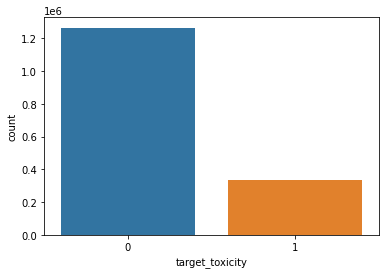

In [ ]:
sns.countplot(y_train['target_toxicity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


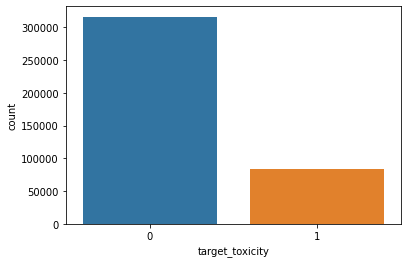

In [ ]:
sns.countplot(y_test['target_toxicity'])

In [ ]:
y_train_toxic = y_train['target_toxicity']

In [ ]:
y_test_toxic = y_test['target_toxicity']

##Making Logistic regression models for other classes too

### XGBClassifier

In [ ]:
xgb = XGBClassifier(max_iter=5000)
xgb.fit(X_train,y_train_toxic)
temp_y_pred=xgb.predict(X_train)
print('Train accuracy: ')
print(accuracy_score(temp_y_pred,y_train_toxic))
val_y_pred=xgb.predict(X_test)
print('Validation accuracy: ')
print(accuracy_score(val_y_pred,y_test_toxic))
print(classification_report(val_y_pred,y_test_toxic))
print(confusion_matrix(val_y_pred,y_test_toxic))

Train accuracy: 
0.8249538012968145
Validation accuracy: 
0.8239373047964131
              precision    recall  f1-score   support

           0       0.99      0.82      0.90    382698
           1       0.18      0.88      0.30     17205

    accuracy                           0.82    399903
   macro avg       0.59      0.85      0.60    399903
weighted avg       0.96      0.82      0.87    399903

[[314306  68392]
 [  2016  15189]]


In [ ]:
pickle.dump(xgb, open('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/xgb_model_tfid_vectorizer.sav', 'wb'))

### LGBMClassifier

In [ ]:
lgb = LGBMClassifier(max_iter=5000)
lgb.fit(X_train,y_train_toxic)
temp_y_pred=lgb.predict(X_train)
print('Train accuracy: ')
print(accuracy_score(temp_y_pred,y_train_toxic))
val_y_pred=lgb.predict(X_test)
print('Validation accuracy: ')
print(accuracy_score(val_y_pred,y_test_toxic))
print(classification_report(val_y_pred,y_test_toxic))
print(confusion_matrix(val_y_pred,y_test_toxic))

Train accuracy: 
0.8540489818781054
Validation accuracy: 
0.8516315206437561
              precision    recall  f1-score   support

           0       0.97      0.86      0.91    357887
           1       0.40      0.79      0.53     42016

    accuracy                           0.85    399903
   macro avg       0.68      0.82      0.72    399903
weighted avg       0.91      0.85      0.87    399903

[[307438  50449]
 [  8884  33132]]


In [ ]:
X_train= pd.read_csv("/content/drive/MyDrive/PRML_COURSE_PROJECT/X_train.csv")
X_test= pd.read_csv("/content/drive/MyDrive/PRML_COURSE_PROJECT/X_test.csv")
y_train= pd.read_csv("/content/drive/MyDrive/PRML_COURSE_PROJECT/y_train.csv")
y_test= pd.read_csv("/content/drive/MyDrive/PRML_COURSE_PROJECT/y_test.csv")

In [ ]:
y_train = y_train['target']
y_test = y_test['target']

### Naive Bayes Model

The cross_val scores are as follows :
[0.25594909 0.26117535 0.25415883 0.26088859 0.26046661]
The accuracy after 5-fold CV is 0.2585276929223791


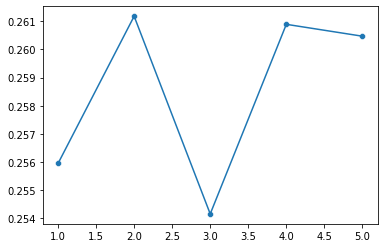

In [ ]:
get_NB_model(X_train,y_train,X_test,y_test,True)

### Multinomial Naive Bayes Model

The cross_val scores are as follows :
[0.40698231 0.40938601 0.40930914 0.40692731 0.4070961 ]
The accuracy after 5-fold CV is 0.40794017518750597


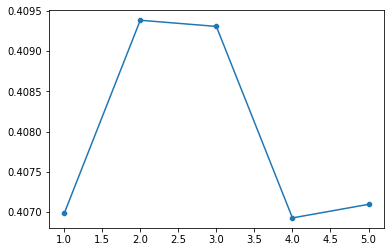

In [ ]:
get_Multinomial_NB_model(X_train,y_train,X_test,y_test,True)

### Random Forest Model

The cross_val scores are as follows :
[0.92077156 0.9192837  0.92038059 0.92047124 0.91957415]
The accuracy after 5-fold CV is 0.9200962484260143


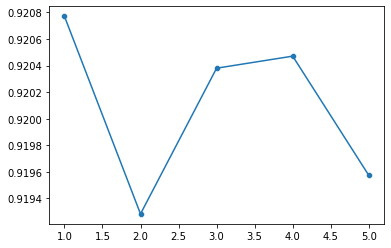

In [ ]:
get_RandomForest_model(X_train,y_train,X_test,y_test,True)

### Quadratic Discriminant Analysis Model

The cross_val scores are as follows :
[0.25456751 0.26001882 0.25238964 0.26003838 0.25951638]
The accuracy after 5-fold CV is 0.25730614675682056


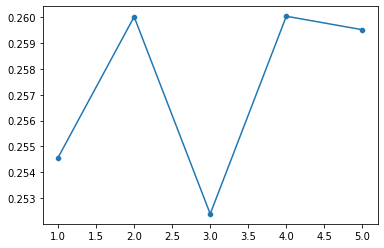

In [ ]:
get_QDA_model(X_train, y_train) 

In [ ]:
X_train=X_train.iloc[:,1:]

In [ ]:
X_test=X_test.iloc[:,1:]

### Neural Networks Model

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=60, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=64)

In [ ]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

49988/49988 [==============================] - 146s 2ms/step - loss: 0.2786 - accuracy: 0.9201
Accuracy: 92.01


In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

12497/12497 [==============================] - 20s 2ms/step - loss: 0.2793 - accuracy: 0.9201
Accuracy: 92.01


In [ ]:
pred=model.predict(X_test)

In [ ]:
pred = [1 if y_v>=0.5 else 0 for y_v in pred]

In [ ]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    367947
           1       0.00      0.00      0.00     31956

    accuracy                           0.92    399903
   macro avg       0.46      0.50      0.48    399903
weighted avg       0.85      0.92      0.88    399903

[[367945      2]
 [ 31956      0]]
0.920085620763035


### Logistic regression model

In [ ]:
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train,y_train_toxic)
temp_y_pred=logreg.predict(X_train)
print('Train accuracy: ')
print(accuracy_score(temp_y_pred,y_train_toxic))
val_y_pred=logreg.predict(X_test)
print('Validation accuracy: ')
print(accuracy_score(val_y_pred,y_test_toxic))
print(classification_report(val_y_pred,y_test_toxic))
print(confusion_matrix(val_y_pred,y_test_toxic))

Train accuracy: 
0.865729314358732
Validation accuracy: 
0.861911513542034
              precision    recall  f1-score   support

           0       0.96      0.88      0.92    347068
           1       0.49      0.77      0.60     52835

    accuracy                           0.86    399903
   macro avg       0.72      0.82      0.76    399903
weighted avg       0.90      0.86      0.87    399903

[[304084  42984]
 [ 12238  40597]]


In [ ]:
pickle.dump(logreg, open('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/logreg_model_tfid_vectorizer.sav', 'wb'))

### Logistic regression selected(Made a sepecific function for it)

In [ ]:
#Function to train model and save it for each individual class (obscene, identity_attack) etc
def train_logreg_model_and_save(class_str):

  X_train, X_test, y_train, y_test = train_test_split(X_final, df_new[cols_target], test_size=0.2, stratify = df_new['target_'+class_str])
  y_train_class_str = y_train['target_' + class_str]
  y_test_class_str = y_test['target_' + class_str]
  logreg = LogisticRegression(max_iter=5000)
  logreg.fit(X_train,y_train_class_str)
  temp_y_pred=logreg.predict(X_train)
  print('Train accuracy: ')
  print(accuracy_score(temp_y_pred,y_train_class_str))
  val_y_pred=logreg.predict(X_test)
  print('Validation accuracy: ')
  print(accuracy_score(val_y_pred,y_test_class_str))
  print(classification_report(val_y_pred,y_test_class_str))
  print(confusion_matrix(val_y_pred,y_test_class_str))
  pickle.dump(logreg, open('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/logreg_model_'+class_str +'_tfid_vectorizer.sav', 'wb'))

Building logistic regression model for 'sexual explicit' class

In [ ]:
train_logreg_model_and_save('sexual_explicit')

Train accuracy: 
0.976634958977552
Validation accuracy: 
0.9757991312893377
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    395329
           1       0.29      0.74      0.41      4574

    accuracy                           0.98    399903
   macro avg       0.64      0.86      0.70    399903
weighted avg       0.99      0.98      0.98    399903

[[386831   8498]
 [  1180   3394]]


Building logistic regression model for 'funny' class

In [ ]:
train_logreg_model_and_save('funny')

Train accuracy: 
0.859340265014266
Validation accuracy: 
0.8587307422049847
              precision    recall  f1-score   support

           0       1.00      0.86      0.92    398781
           1       0.01      0.46      0.02      1122

    accuracy                           0.86    399903
   macro avg       0.50      0.66      0.47    399903
weighted avg       1.00      0.86      0.92    399903

[[342895  55886]
 [   608    514]]


Building logistic regression model for 'obscene' class

In [ ]:
train_logreg_model_and_save('obscene')

Train accuracy: 
0.9509837385566
Validation accuracy: 
0.9498228320367689
              precision    recall  f1-score   support

           0       0.99      0.96      0.97    386723
           1       0.38      0.80      0.51     13180

    accuracy                           0.95    399903
   macro avg       0.68      0.88      0.74    399903
weighted avg       0.97      0.95      0.96    399903

[[369330  17393]
 [  2673  10507]]


Building logistic regression model for 'threat' class

In [ ]:
train_logreg_model_and_save('threat')

Train accuracy: 
0.9548152927084818
Validation accuracy: 
0.9537562858993306
              precision    recall  f1-score   support

           0       0.99      0.96      0.98    395143
           1       0.14      0.57      0.23      4760

    accuracy                           0.95    399903
   macro avg       0.57      0.77      0.60    399903
weighted avg       0.98      0.95      0.97    399903

[[378684  16459]
 [  2034   2726]]


Building logistic regression model for 'identity_attack' class

In [ ]:
train_logreg_model_and_save('identity_attack')

Train accuracy: 
0.9127644703840682
Validation accuracy: 
0.9111884632023266
              precision    recall  f1-score   support

           0       0.98      0.92      0.95    381977
           1       0.29      0.69      0.41     17926

    accuracy                           0.91    399903
   macro avg       0.64      0.81      0.68    399903
weighted avg       0.95      0.91      0.93    399903

[[352019  29958]
 [  5558  12368]]


Building logistic regression model for 'insult' class

In [ ]:
train_logreg_model_and_save('insult')

Train accuracy: 
0.8404463082297458
Validation accuracy: 
0.8351075135720413
              precision    recall  f1-score   support

           0       0.95      0.85      0.90    336144
           1       0.49      0.77      0.60     63759

    accuracy                           0.84    399903
   macro avg       0.72      0.81      0.75    399903
weighted avg       0.88      0.84      0.85    399903

[[284905  51239]
 [ 14702  49057]]


##Evaluating the different models used

In [ ]:
x2 = PrettyTable()
x2.add_row(["  ", "  ", "  ", "  ", "Non-Toxic Class", "  ","  ", "Toxic Class", "  "])
x2.add_row(["Model Name", "Training Accuracy", "Test Accuracy", "Precision", "Recall", "F1-score","Precision", "Recall", "F1-score"])
x2.add_row(['XGBClassifier',0.8249, 0.8239, 0.99, 0.82, 0.90, 0.18, 0.88, 0.30])
x2.add_row(['LightGBMClassifier', 0.8540, 0.8516, 0.97, 0.86, 0.91, 0.40, 0.79, 0.53])
x2.add_row(['Gaussian NB', 0.2587, 0.2357, '-','-','-','-','-','-'])
x2.add_row(['Multinomial NB',0.4079, 0.2357, '-','-','-','-','-','-'])
x2.add_row(['QDA',0.2573, 0.2381, '-','-','-','-','-','-'])
x2.add_row(['Random Forest',0.9200, 0.9159, 0.99, 0.92, 0.95, 0.58, 0.87, 0.69])
x2.add_row(['Logictic Regression',0.8657, 0.8619, 0.96, 0.85, 0.92, 0.59, 0.89, 0.71])
x2.add_row(['MLP',0.9213, 0.9056, 0.92, 1, 0.96, 0.00, 0.00, 0.00])
print(x2)

+---------------------+-------------------+---------------+-----------+-----------------+----------+-----------+-------------+----------+
|       Field 1       |      Field 2      |    Field 3    |  Field 4  |     Field 5     | Field 6  |  Field 7  |   Field 8   | Field 9  |
+---------------------+-------------------+---------------+-----------+-----------------+----------+-----------+-------------+----------+
|                     |                   |               |           | Non-Toxic Class |          |           | Toxic Class |          |
|      Model Name     | Training Accuracy | Test Accuracy | Precision |      Recall     | F1-score | Precision |    Recall   | F1-score |
|    XGBClassifier    |       0.8249      |     0.8239    |    0.99   |       0.82      |   0.9    |    0.18   |     0.88    |   0.3    |
|  LightGBMClassifier |       0.854       |     0.8516    |    0.97   |       0.86      |   0.91   |    0.4    |     0.79    |   0.53   |
|     Gaussian NB     |       0.25

In [ ]:
x2 = PrettyTable()
x2.title = 'Scores on sub-class of Toxic Comment Using Logistic Regression'

x2.field_names = ["Sub-Class","Precision_0", "Recall_0", "F1-score_0","Precision_1", "Recall_1", "F1-score_1"]
x2.add_row(["  ","  ", "Non-Toxic Class", "  ","  ", "Toxic Class", "  "])
x2.add_row(['Sexual_explicit', 1, 0.98,0.99, 0.29, 0.74, 0.41])
x2.add_row(['funny', 1, 0.86,0.92, 0.01, 0.46, 0.02])
x2.add_row(['obscene', 0.99, 0.96,0.97, 0.38, 0.80, 0.51])
x2.add_row(['threat', 0.99, 0.96,0.98, 0.14, 0.57, 0.23])
x2.add_row(['identity_attack', 0.98, 0.92,0.95, 0.29, 0.69, 0.41])
x2.add_row(['insult', 0.95, 0.85,0.90, 0.49, 0.77, 0.60])
print(x2)

+-------------------------------------------------------------------------------------------------------+
|                     Scores on sub-class of Toxic Comment Using Logistic Regression                    |
+-----------------+-------------+-----------------+------------+-------------+-------------+------------+
|    Sub-Class    | Precision_0 |     Recall_0    | F1-score_0 | Precision_1 |   Recall_1  | F1-score_1 |
+-----------------+-------------+-----------------+------------+-------------+-------------+------------+
|                 |             | Non-Toxic Class |            |             | Toxic Class |            |
| Sexual_explicit |      1      |       0.98      |    0.99    |     0.29    |     0.74    |    0.41    |
|      funny      |      1      |       0.86      |    0.92    |     0.01    |     0.46    |    0.02    |
|     obscene     |     0.99    |       0.96      |    0.97    |     0.38    |     0.8     |    0.51    |
|      threat     |     0.99    |       0.96  

In [ ]:
f1_scores = [0.3, 0.53, 0.69, 0.71, 0.0]
model_names=['XGBClassifier', 'LightGBM Classifier', 'Random Forest', 'Logistic Regression', 'MLP']
test_accuracies = [0.8239, 0.8516, 0.9159, 0.8619, 0.9056]

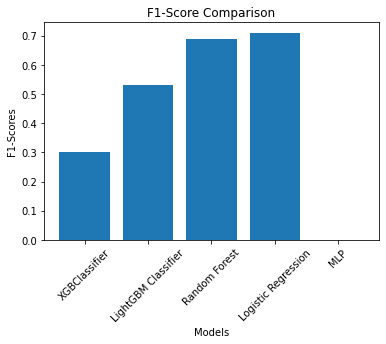

In [ ]:
import matplotlib.pyplot as plt
plt.bar(model_names, f1_scores) 

# Define x-axis label
plt.xticks(rotation = 45)
plt.xlabel("Models")
plt.ylabel("F1-Scores")
plt.title('F1-Score Comparison')
# Display Graph

plt.show()

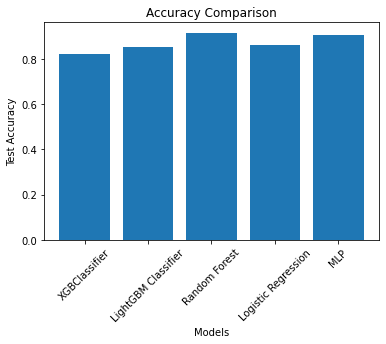

In [ ]:
plt.bar(model_names, test_accuracies) 

# Define x-axis label
plt.xticks(rotation = 45)
plt.xlabel("Models")
plt.ylabel("Test Accuracy")
plt.title('Accuracy Comparison')
# Display Graph

plt.show()

##Pipelining the entire process

The input comments will directly be processed(vectorised) and then we can get the results directly

In [ ]:
def load_models_and_vectorizer():
  model = pickle.load(open('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/logreg_model_tfid_vectorizer.sav', 'rb'))
  model1 = pickle.load(open('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/logreg_model_identity_attack_tfid_vectorizer.sav'), 'rb')
  model2 = pickle.load(open('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/logreg_model_funny_tfid_vectorizer.sav'), 'rb')
  model3 = pickle.load(open('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/logreg_model_insult_tfid_vectorizer.sav'), 'rb')
  model4 = pickle.load(open('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/logreg_model_obscene_tfid_vectorizer.sav'), 'rb')
  model5 = pickle.load(open('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/logreg_model_sexual_explicit_tfid_vectorizer.sav'), 'rb')
  model6 = pickle.load(open('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/logreg_model_threat_tfid_vectorizer.sav'), 'rb')
  return
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
def preprocess(text_string):
    text_string = "".join([c for c in text_string if c not in string.punctuation])
    text_string.replace('fucker', 'fuck')
    text_string.replace('nigga', 'nigger')
    text_string = text_string.lower() # Convert everything to lower case.
    text_string = re.sub('[^A-Za-z0-9]+', ' ', text_string) # Remove special characters and punctuations
    
    x = text_string.split()
    new_text = []
    
    for word in x:
        if word not in stop_words:
            new_text.append(stemmer.stem(word))
            
    text_string = ' '.join(new_text)
    return text_string
def pipelined_output(comment):
  model = pickle.load(open('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/logreg_model_tfid_vectorizer.sav', 'rb'))
  model1 = pickle.load(open('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/logreg_model_identity_attack_tfid_vectorizer.sav', 'rb'))
  model2 = pickle.load(open('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/logreg_model_funny_tfid_vectorizer.sav', 'rb'))
  model3 = pickle.load(open('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/logreg_model_insult_tfid_vectorizer.sav', 'rb'))
  model4 = pickle.load(open('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/logreg_model_obscene_tfid_vectorizer.sav', 'rb'))
  model5 = pickle.load(open('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/logreg_model_sexual_explicit_tfid_vectorizer.sav', 'rb'))
  model6 = pickle.load(open('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/logreg_model_threat_tfid_vectorizer.sav', 'rb'))
  comment = preprocess(comment)
  transformer = TfidfTransformer()
  loaded_vec = CountVectorizer(decode_error="replace",vocabulary=pickle.load(open('/content/drive/MyDrive/PRML_CourseProject_ToxicComment/feature.pkl', "rb")))
  comment_pre = transformer.fit_transform(loaded_vec.fit_transform(np.array([comment])))
  y_pred = model.predict(comment_pre.reshape(1, -1)) 
  # print(model.coef_)
  # y_pred = 0.5
  y_pred=(y_pred>0.50)
  types = ""
  result = "Toxic" if y_pred else "Non Toxic"
  if(result == "Toxic"):
      y_pred1 = model1.predict(comment_pre.reshape(1, -1))
      y_pred2 = model2.predict(comment_pre.reshape(1, -1))
      y_pred3 = model3.predict(comment_pre.reshape(1, -1))
      y_pred4 = model4.predict(comment_pre.reshape(1, -1))
      y_pred5 = model5.predict(comment_pre.reshape(1, -1))
      y_pred6 = model6.predict(comment_pre.reshape(1, -1))
    
      if y_pred1:
          types+= "identity attack,"
      if y_pred2:
          types+= "funny,"
      if y_pred3:
          types+= "insult,"
      if y_pred4:
          types+= "obscene,"
      if y_pred5:
          types+= "sexual explicit,"
      if y_pred6:
          types+= "threat,"
      types = types[:-1]
  print('The given comment is: '+str(result))
  print('The subtypes of toxicity detected in the comment: '+ types)

In [ ]:
pipelined_output('I will kill you dumb, idiotic person. You have become the CEO of company XYZ illegaly.')

The given comment is: Toxic
The subtypes of toxicity detected in the comment: insult,obscene,threat


In [ ]:
pipelined_output('Hitler was the best dictator')

The given comment is: Non Toxic
The subtypes of toxicity detected in the comment: 
